<a href="https://colab.research.google.com/gist/Larinwa/d0cb08af826ca3d177a004dacd8e1ce2/assignment_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment:
Training ANN and CNN model on CIFAR10 data set

In [ ]:
#!pip install torchvision

In [ ]:
import torch
from torch import nn
from torch import optim

import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### Data Preparation

In [ ]:
# Setup transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

# Import the dataset
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Set up the dataloader
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=True)



Files already downloaded and verified
Files already downloaded and verified


In [ ]:
image, label = train_data[0]
print("Image shape:", image.shape)

Image shape: torch.Size([3, 32, 32])


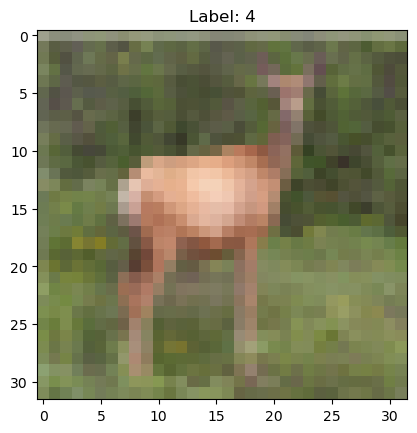

In [ ]:
for images, labels in train_loader:
    image = images[0]
    label = labels[0]

    # Convert the image for plotting
    #rearrange the dimension of the tensors (Height, Width, Channel) to match the format without altering the data
    image = image.permute(1, 2, 0).numpy()
    image = (image * 0.5 + 0.5).clip(0,1)
    plt.imshow(image)
    plt.title(f'Label: {label.item()}')
    plt.show()
    break

In [ ]:
# Define the neural network
class Image_Ann(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.input_layer = nn.Linear(3* 32 * 32, 500)  # Adjust for 32x32 grayscale images
        self.fc1 = nn.Linear(500, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)

    def forward(self, x: torch.tensor):
        x = x.view(-1,3 * 32 * 32)  # Flatten each image
        result = torch.relu(self.input_layer(x))
        result = torch.relu(self.fc1(result))
        result = torch.relu(self.fc2(result))
        result = torch.relu(self.fc3(result))
        result = self.out(result)
        return result


In [ ]:
# initialize the model, optimizer, criterion, learning rate, epoch

model = Image_Ann()
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
epochs = 5
optimizer = optim.Adam(params = model.parameters(), lr=learning_rate)

In [ ]:
# set up the training loop

for epoch in range(epochs):
    training_loss = 0.0
    for i, (image, label) in enumerate(train_loader):
        # wipe gradients
        optimizer.zero_grad()

        # forward pass
        train_preds = model(image)
        loss = criterion(train_preds, label)

        # back propagate
        loss.backward()
        optimizer.step()

        training_loss += loss.item()
        if (i % 100) == 0:
            print(f'Epoch: {epoch+1}/{epochs}...step: {i}/{len(train_loader)}...Loss: {loss.item()}')

print(f'Epoch: {epoch+1}/{epochs}.....Loss: {training_loss/len(train_loader)}')

Epoch: 1/5...step: 0/782...Loss: 2.308802843093872
Epoch: 1/5...step: 100/782...Loss: 1.9398788213729858
Epoch: 1/5...step: 200/782...Loss: 1.7672568559646606
Epoch: 1/5...step: 300/782...Loss: 1.8045432567596436
Epoch: 1/5...step: 400/782...Loss: 1.6603662967681885
Epoch: 1/5...step: 500/782...Loss: 1.727503776550293
Epoch: 1/5...step: 600/782...Loss: 1.6788090467453003
Epoch: 1/5...step: 700/782...Loss: 1.6116580963134766
Epoch: 2/5...step: 0/782...Loss: 1.527690052986145
Epoch: 2/5...step: 100/782...Loss: 1.8104549646377563
Epoch: 2/5...step: 200/782...Loss: 1.4886929988861084
Epoch: 2/5...step: 300/782...Loss: 1.628016471862793
Epoch: 2/5...step: 400/782...Loss: 1.5749099254608154
Epoch: 2/5...step: 500/782...Loss: 1.7819088697433472
Epoch: 2/5...step: 600/782...Loss: 1.5937227010726929
Epoch: 2/5...step: 700/782...Loss: 1.486786127090454
Epoch: 3/5...step: 0/782...Loss: 1.3747166395187378
Epoch: 3/5...step: 100/782...Loss: 1.356891393661499
Epoch: 3/5...step: 200/782...Loss: 1.259

In [ ]:
# evaluate the model
all_predictions = []
all_labels = []

model.eval()
with torch.no_grad():
    for image, label in test_loader:
        test_pred = model(image)
        _, preds = torch.max(test_pred, 1)
        preds = preds.detach().numpy()
        label = label.detach().numpy()
        all_labels.extend(label)
        all_predictions.extend(preds)

<Axes: >

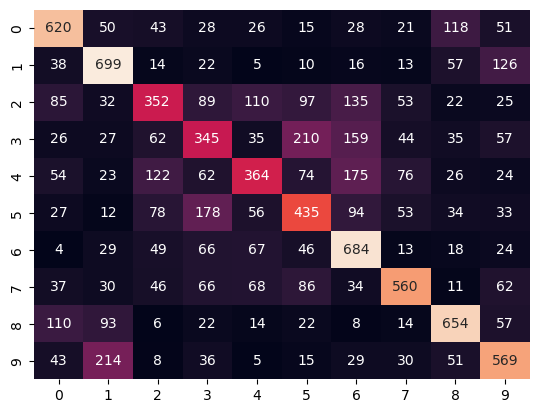

In [ ]:
import seaborn as sns


sns.heatmap(data=confusion_matrix(all_labels, all_predictions),
            annot=True, cbar=False, fmt='d')

In [ ]:
print(classification_report(all_labels, all_predictions))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61      1000
           1       0.58      0.70      0.63      1000
           2       0.45      0.35      0.40      1000
           3       0.38      0.34      0.36      1000
           4       0.49      0.36      0.42      1000
           5       0.43      0.43      0.43      1000
           6       0.50      0.68      0.58      1000
           7       0.64      0.56      0.60      1000
           8       0.64      0.65      0.65      1000
           9       0.55      0.57      0.56      1000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



In [ ]:
torch.max(test_pred, 1)

torch.return_types.max(
values=tensor([5.7909, 1.7233, 6.1015, 4.0231, 4.2232, 3.8141, 2.8098, 1.5710, 0.6299,
        1.8825, 1.1894, 1.7798, 1.4350, 5.2254, 3.9179, 1.9298]),
indices=tensor([1, 4, 9, 4, 7, 9, 2, 1, 3, 9, 4, 5, 3, 1, 9, 2]))

In [ ]:
test_pred

tensor([[ 1.7421,  5.7909, -1.8245, -0.7573, -2.8339, -1.4396, -3.0531, -1.9724,
          1.7028, -0.0177],
        [ 0.6432, -2.2399,  0.9641,  0.1400,  1.7233,  0.4305,  0.1671,  1.2843,
         -2.4827, -2.1137],
        [ 0.6580,  6.0959, -0.8482, -1.3785, -3.8478, -3.8840, -4.4735, -3.1230,
          1.1202,  6.1015],
        [-1.3089, -2.8588,  1.8957,  0.3055,  4.0231, -0.1333,  2.7291, -0.4890,
         -4.7835, -4.0316],
        [-0.4272, -1.7503,  0.7539, -0.5737,  2.1845,  0.1505, -0.7689,  4.2232,
         -2.3787, -2.1795],
        [ 0.7814,  1.4991, -0.8859, -1.1283, -0.9465, -2.7469, -2.5772, -0.8540,
          1.0090,  3.8141],
        [-1.0153, -2.9396,  2.8098,  0.6134,  2.6109,  1.8266,  0.4599,  1.0741,
         -3.4883, -2.8791],
        [ 1.1881,  1.5710, -1.1762, -0.2796, -0.3677, -0.8390,  0.4215, -2.7800,
          0.6725, -2.4683],
        [ 0.3161, -0.4989,  0.2035,  0.6299, -0.1605,  0.1405, -0.6521,  0.1087,
         -1.5842,  0.2959],
        [-0.5093, -

### CONVOLUTIONAL NEURAL NETWORK (CNN)

In [ ]:
# Setup transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

# Import the dataset
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Set up the dataloader
train_loader = DataLoader(dataset=train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=128, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
image, label = train_data[0]
print("Image shape:", image.shape)

Image shape: torch.Size([3, 32, 32])


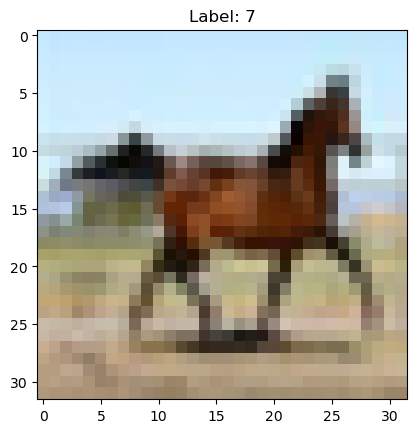

In [ ]:
for images, labels in train_loader:
    image = images[0]
    label = labels[0]

    # Convert the image for plotting
    #rearrange the dimension of the tensors (Height, Width, Channel) to match the format without altering the data
    image = image.permute(1, 2, 0).numpy()
    image = (image * 0.5 + 0.5).clip(0,1)
    plt.imshow(image)
    plt.title(f'Label: {label.item()}')
    plt.show()
    break

#### Insight
The size of the image(s) is 32 by 32 and has 3 channels (since its RGB). We are calling the permute function the rearrage our tensors such that:
* Channel (C) which is the first dimension will be refres to as Index 0
* Height (H) which is the second dimension will be refres to as Index 1
* Widght (W) which is the third dimension will be refres to as Index 2

In [ ]:
class CNN_Image(nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.conv_one = nn.Conv2d(in_channels=3, out_channels= 32, kernel_size= 3,stride = 1, padding= 1)
        self.conv_two = nn.Conv2d(in_channels=32, out_channels= 64, kernel_size=3, stride = 1, padding = 1)
        self.conv_three = nn.Conv2d(in_channels=64, out_channels= 128, kernel_size=3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size=3, padding = 1, stride = 2)

        # fully connected layer
        self.fc1 = nn.Linear(in_features=128 * 4 * 4, out_features=900)
        self.fc2 = nn.Linear(in_features=900, out_features=600)
        self.fc3 = nn.Linear(in_features=600, out_features=300)
        self.fc4 = nn.Linear(in_features=300, out_features=100)
        self.out = nn.Linear(in_features=100, out_features=10)

    def forward(self, result:torch.tensor):
        # pool first
        result = self.pool(torch.relu(self.conv_one(result)))
        result = self.pool(torch.relu(self.conv_two(result)))
        result = self.pool(torch.relu(self.conv_three(result)))
        # adjust what is left of the pooling to align as inputs of the feed forward NN
        result = result.view(-1, 128 * 4 * 4)
        result = torch.relu(self.fc1(result))
        result = torch.relu(self.fc2(result))
        result = torch.relu(self.fc3(result))
        result = torch.relu(self.fc4(result))
        output = self.out(result)

        return output

In [ ]:
learning_rate = 1e-4
epochs = 5
criterion = nn.CrossEntropyLoss()#Because we are dealing witha multiclass classificaton
model = CNN_Image()
optimizer = optim.Adam(params=model.parameters(), lr = learning_rate)

In [ ]:
# set up the training loop

for epoch in range(epochs):
    training_loss = 0.0
    for i, (image, label) in enumerate(train_loader):
        # wipe gradients
        optimizer.zero_grad()

        # forward pass
        train_preds = model(image)
        loss = criterion(train_preds, label)

        # back propagate
        loss.backward()
        optimizer.step()

        training_loss += loss.item()
        if (i % 100) == 0:
            print(f'Epoch: {epoch+1}/{epochs}...step: {i}/{len(train_loader)}...Loss: {loss.item()}')

print(f'Epoch: {epoch+1}/{epochs}.....Loss: {training_loss/len(train_loader)}')

Epoch: 1/5...step: 0/391...Loss: 2.3006961345672607
Epoch: 1/5...step: 100/391...Loss: 2.141619920730591
Epoch: 1/5...step: 200/391...Loss: 1.7996327877044678
Epoch: 1/5...step: 300/391...Loss: 1.6632685661315918
Epoch: 2/5...step: 0/391...Loss: 1.7689518928527832
Epoch: 2/5...step: 100/391...Loss: 1.6256498098373413
Epoch: 2/5...step: 200/391...Loss: 1.6739909648895264
Epoch: 2/5...step: 300/391...Loss: 1.5961452722549438
Epoch: 3/5...step: 0/391...Loss: 1.6376324892044067
Epoch: 3/5...step: 100/391...Loss: 1.6532783508300781
Epoch: 3/5...step: 200/391...Loss: 1.5071334838867188
Epoch: 3/5...step: 300/391...Loss: 1.425547480583191
Epoch: 4/5...step: 0/391...Loss: 1.3221787214279175
Epoch: 4/5...step: 100/391...Loss: 1.4719195365905762
Epoch: 4/5...step: 200/391...Loss: 1.3332346677780151
Epoch: 4/5...step: 300/391...Loss: 1.400515079498291
Epoch: 5/5...step: 0/391...Loss: 1.2637382745742798
Epoch: 5/5...step: 100/391...Loss: 1.3669456243515015
Epoch: 5/5...step: 200/391...Loss: 1.3570

In [ ]:
# evaluate the model
all_predictions = []
all_labels = []

model.eval()
with torch.no_grad():
    for image, label in test_loader:
        test_pred = model(image)
        _, preds = torch.max(test_pred, 1)
        preds = preds.detach().numpy()
        label = label.detach().numpy()
        all_labels.extend(label)
        all_predictions.extend(preds)

<Axes: >

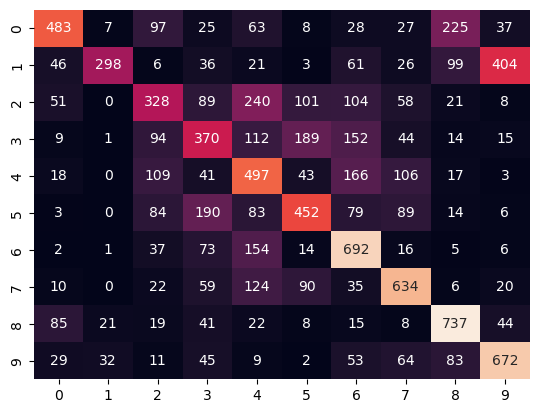

In [ ]:
import seaborn as sns


sns.heatmap(data = confusion_matrix(all_labels, all_predictions),
            annot = True, cbar = False, fmt = 'd')

In [ ]:
print(classification_report(all_labels, all_predictions))

              precision    recall  f1-score   support

           0       0.66      0.48      0.56      1000
           1       0.83      0.30      0.44      1000
           2       0.41      0.33      0.36      1000
           3       0.38      0.37      0.38      1000
           4       0.38      0.50      0.43      1000
           5       0.50      0.45      0.47      1000
           6       0.50      0.69      0.58      1000
           7       0.59      0.63      0.61      1000
           8       0.60      0.74      0.66      1000
           9       0.55      0.67      0.61      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.54      0.52      0.51     10000

